In [1]:
import pandas as pd
import numpy as np

import scipy.stats as st

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(palette='deep', style='darkgrid', rc={"figure.figsize": (15, 8)})


import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/VlasovKirill/ml_mipt_dafe_minor/master/data/Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [4]:
df['Time'] = df['Time'].str.replace('c:','')

In [5]:
df.tail()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [6]:
df.shape[0]

5268

In [7]:
df.shape[1]

13

In [8]:
df_info = pd.DataFrame(df.dtypes, columns=['Type'])

In [9]:
df_info

,Type
Date,object
Time,object
Location,object
Operator,object
Flight #,object
Route,object
Type,object
Registration,object
cn/In,object
Aboard,float64


In [10]:
df['Location'].nunique()

4303

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Date'])
df.dtypes

Date            datetime64[ns]
Time            datetime64[ns]
Location                object
Operator                object
Flight #                object
Route                   object
Type                    object
Registration            object
cn/In                   object
Aboard                 float64
Fatalities             float64
Ground                 float64
Summary                 object
dtype: object

In [13]:
df['year'] = df['Date'].dt.year

In [14]:
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day of week'] = df['Date'].dt.dayofweek # Monday = 0, Sunday = 6,

df['Hours'] = df['Time'].dt.hour
df.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,month,day,day of week,Hours
0,1908-09-17,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,3,0
1,1912-07-12,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12,4,0
2,1913-08-06,1913-08-06,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8,6,2,0


In [15]:
df[df['year'] == 2002].shape[0]

75

In [16]:
df[df['Fatalities'] + df['Ground'] > 200].shape[0]

30

In [17]:
df['all_victims'] = df['Fatalities'] + df['Ground']

In [18]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,month,day,day of week,Hours,all_victims
0,1908-09-17,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,3,0,1.0
1,1912-07-12,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12,4,0,5.0
2,1913-08-06,1913-08-06,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8,6,2,0,1.0
3,1913-09-09,1913-09-09,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9,9,1,0,14.0
4,1913-10-17,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10,17,4,0,30.0


In [19]:
df[(df['all_victims'] > 200) & (df['year'] == 2002)].shape[0]

1

In [20]:
print('В 2002 году в ', df[(df['year'] == 2002) & (df['all_victims'] > 200)]['Location'].values[0],
      'разбился', df[(df['year'] == 2002) & (df['all_victims'] > 200)]['Type'].values[0], '. '
      'Общее кол-во жертв', df[(df['year'] == 2002) & (df['all_victims'] > 200)]['all_victims'].values[0]
     )

В 2002 году в  Off Penghu Island, Taiwan разбился Boeing B-747-209B . Общее кол-во жертв 225.0


In [21]:
df['Location'].head()

0                   Fort Myer, Virginia
1               AtlantiCity, New Jersey
2    Victoria, British Columbia, Canada
3                    Over the North Sea
4            Near Johannisthal, Germany
Name: Location, dtype: object

In [22]:
loc = df['Location'].str.split(',', expand=True)
loc.head()

,0,1,2,3
0,Fort Myer,Virginia,None,None
1,AtlantiCity,New Jersey,None,None
2,Victoria,British Columbia,Canada,None
3,Over the North Sea,None,None,None
4,Near Johannisthal,Germany,None,None


In [23]:
loc[3] = loc[3].fillna(loc[2])
loc[3] = loc[3].fillna(loc[1])
loc[3] = loc[3].fillna(loc[0])
loc[3].nunique()

567

In [24]:
df_full = pd.merge(df, loc, left_index=True, right_index=True)
df_full.head(2)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,...,year,month,day,day of week,Hours,all_victims,0,1,2,3
0,1908-09-17,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,...,1908,9,17,3,0,1.0,Fort Myer,Virginia,None,Virginia
1,1912-07-12,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,...,1912,7,12,4,0,5.0,AtlantiCity,New Jersey,None,New Jersey


In [25]:
df_full = df_full.drop([0,1,2], axis=1)
df_full.columns.values[19] = 'Country'
df_full.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,month,day,day of week,Hours,all_victims,Country
0,1908-09-17,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,3,0,1.0,Virginia
1,1912-07-12,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12,4,0,5.0,New Jersey
2,1913-08-06,1913-08-06,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8,6,2,0,1.0,Canada


In [26]:
def get_day_time(hour):
    return {
          0 <= hour < 6:   'Ночь',
          6 <= hour < 11:  'Утро',
         11 <= hour < 19:  'День',
         19 <= hour < 23:  'Вечер',
         23 <= hour < 25:  'Ночь'
    }[True]
        
df_full['Day_period'] = df_full['Hours'].fillna(0).apply(lambda x: get_day_time(x))
df_full['Holiday'] = df_full['day of week'].fillna(0).apply(lambda x: 1 if x >= 5 else 0) 

In [27]:
df_full.groupby('year').sum().sort_values('all_victims', ascending=False).head(10)

,Aboard,Fatalities,Ground,month,day,day of week,Hours,all_victims,Holiday
year,,,,,,,,,
2001,2111.0,1398.0,5641.0,486,1054,200,0,7039.0,18
1972,3635.0,2937.0,30.0,695,1690,319,0,2967.0,28
1985,3480.0,2670.0,1.0,451,1232,214,0,2671.0,15
1996,3058.0,2386.0,284.0,555,1192,230,0,2670.0,22
1973,3433.0,2485.0,16.0,581,1568,241,0,2501.0,23
1989,3643.0,2293.0,79.0,672,1729,270,0,2372.0,20
1974,3064.0,2318.0,0.0,543,1306,288,0,2318.0,29
1976,2629.0,2059.0,143.0,536,1224,271,0,2202.0,26
1992,2965.0,2122.0,69.0,593,1537,236,0,2191.0,20


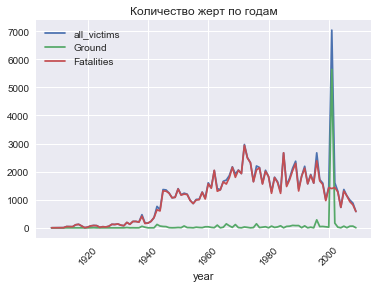

In [28]:
df.groupby('year').sum()[['all_victims', 'Ground', 'Fatalities']].plot(rot=45) #kind='bar'
plt.title('Количество жерт по годам')
plt.show()

In [29]:
crashes_by_year = pd.pivot_table(df_full, index='year', values=['Aboard','Fatalities','Ground','all_victims'], aggfunc='sum')
crashes_by_year['count'] =  pd.pivot_table(df_full, index='year', values=['all_victims'], aggfunc='count').values.T[0]
crashes_by_year.tail()

,Aboard,Fatalities,Ground,all_victims,count
year,,,,,
2005,2164.0,1306.0,59.0,1365.0,51
2006,1413.0,1136.0,4.0,1140.0,49
2007,1364.0,931.0,57.0,988.0,54
2008,1463.0,820.0,60.0,880.0,62
2009,891.0,581.0,3.0,580.0,23


In [30]:
crashes_by_year['victims_on_incident'] = crashes_by_year['all_victims']/crashes_by_year['count']

In [31]:
crashes_by_year.corr()

,Aboard,Fatalities,Ground,all_victims,count,victims_on_incident
Aboard,1.000000,0.971557,0.088475,0.809457,0.911233,0.638954
Fatalities,0.971557,1.000000,0.073032,0.822771,0.921589,0.649083
Ground,0.088475,0.073032,1.000000,0.626929,0.092734,0.722433
all_victims,0.809457,0.822771,0.626929,1.000000,0.772748,0.918634
count,0.911233,0.921589,0.092734,0.772748,1.000000,0.550019
victims_on_incident,0.638954,0.649083,0.722433,0.918634,0.550019,1.000000


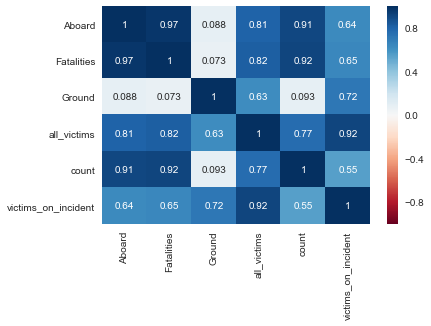

In [32]:
sns.heatmap(crashes_by_year.corr(), 
         vmin=-1, vmax=1,annot=True, cmap='RdBu',)
plt.show()

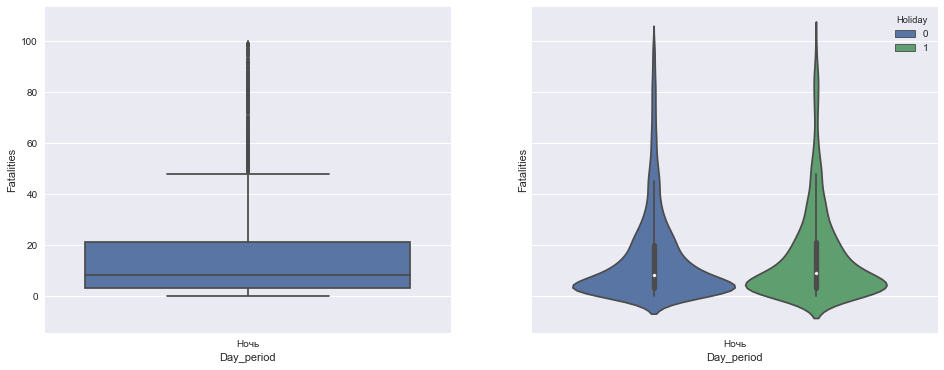

In [33]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.boxplot(x="Day_period", y="Fatalities", data=df_full[df_full['Fatalities'] < 100],  ax=axes[0]);
sns.violinplot(x="Day_period", y="Fatalities", data=df_full[df_full['Fatalities'] < 100], ax=axes[1],
              hue='Holiday');

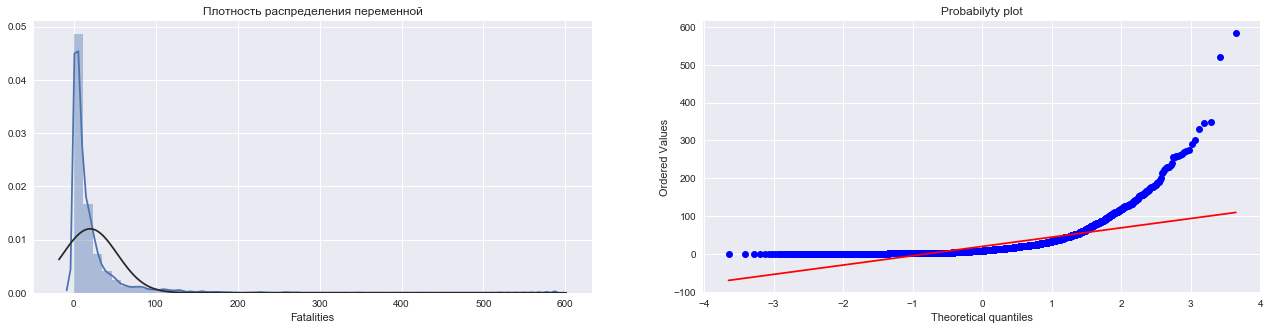

In [34]:
fig = plt.figure(figsize=(22, 5))
ax1 = fig.add_subplot(121)
sns.distplot(df_full['Fatalities'].dropna(), fit=st.norm, kde=True,ax=ax1, bins=50)
ax1.set_title('Плотность распределения переменной')
ax2 = fig.add_subplot(122)
prob = st.probplot(df_full['Fatalities'].dropna(), dist=st.norm, plot=ax2)
ax2.set_title('Probabilyty plot')
plt.show()

In [35]:
df_full['Country'].value_counts()

 Brazil                           184
 Alaska                           176
 Russia                           171
 Colombia                         146
 Canada                           145
 California                       143
 France                           130
 England                          104
 India                             97
 China                             85
 Indonesia                         84
 Mexico                            81
 Germany                           78
 Italy                             77
 Australia                         76
 Philippines                       66
 Spain                             65
 New York                          62
 USSR                              61
 Venezuela                         58
 Peru                              54
 Texas                             51
 Ohio                              50
 Japan                             45
 Argentina                         44
 Bolivia                           44
 Washington 

In [45]:
df_full.head(2)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,...,Summary,year,month,day,day of week,Hours,all_victims,Country,Day_period,Holiday
0,1908-09-17,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,...,"During a demonstration flight, a U.S. Army fly...",1908,9,17,3,0,1.0,Virginia,Ночь,0
1,1912-07-12,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,...,First U.S. dirigible Akron exploded just offsh...,1912,7,12,4,0,5.0,New Jersey,Ночь,0


In [54]:
df_full.groupby('Operator').sum().sort_values('all_victims', ascending=False).head()

,Aboard,Fatalities,Ground,year,month,day,day of week,Hours,all_victims,Holiday
Operator,,,,,,,,,,
Aeroflot,8870.0,7156.0,28.0,353702,1245,2952,572,0,7184.0,50
American Airlines,2063.0,1421.0,2889.0,70579,234,550,93,0,4310.0,7
Military - U.S. Air Force,4502.0,3717.0,178.0,346417,1154,2903,513,0,3866.0,41
United Air Lines,2460.0,1021.0,2753.0,86127,348,676,116,0,3770.0,8
Air France,2874.0,1734.0,5.0,136651,450,964,167,0,1739.0,18


In [57]:
df_full[(df_full['year'] == 2001) & 
        (df_full['month'] == 9) & 
        (df_full['day'] == 11)]['all_victims'].sum()

5890.0

In [59]:
df_full['day of week'].value_counts()

3    818
4    797
2    796
1    796
5    741
0    713
6    607
Name: day of week, dtype: int64

In [64]:
df_full[df_full['Country'] == 'Russia']

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,...,Summary,year,month,day,day of week,Hours,all_victims,Country,Day_period,Holiday
78,1923-11-18,1923-11-18,Russia,CCCP,NaN,NaN,Junkers F-13,D-257,NaN,4.0,...,NaN,1923,11,18,6,0,2.0,Russia,Ночь,1
1835,1963-02-08,1963-02-08,"Syktyvkar ,Russia",Aeroflot,NaN,Training,Antonov An-10A,CCCP-11193,0402104,7.0,...,The plane stalled and crashed.,1963,2,8,4,0,7.0,Russia,Ночь,0


In [65]:
df_full.groupby('Country').sum().sort_values('all_victims', ascending=False).head(10)

,Aboard,Fatalities,Ground,year,month,day,day of week,Hours,all_victims,Holiday
Country,,,,,,,,,,
New York,2934.0,1558.0,5528.0,122124,407,929,186,0,7086.0,20
Russia,7931.0,6627.0,58.0,339066,1231,2893,543,0,6685.0,54
Brazil,4435.0,3186.0,71.0,362852,1226,2784,533,0,3257.0,41
Colombia,3202.0,2890.0,41.0,288665,880,2400,446,0,2931.0,46
USSR,3296.0,2831.0,0.0,120511,452,900,187,0,2831.0,13
France,3329.0,2734.0,28.0,254172,868,1874,353,0,2762.0,31
India,3222.0,2603.0,153.0,190749,616,1544,296,0,2756.0,33
China,3315.0,2189.0,49.0,166758,578,1383,250,0,2230.0,21
Japan,3095.0,2050.0,2.0,88527,251,737,110,0,2035.0,8
